In [1]:
import pandas as pd
housing = pd.read_csv('housing_sample.csv')
housing.head(3)

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [2]:
mean_price = housing['SalePrice'].mean()
mean_price

180921.19589041095

In [3]:
price_per_sq_foot = (housing['SalePrice']/housing['GrLivArea']).mean()
price_per_sq_foot

120.57287807326834

In [4]:
group_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(), 
             housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
             housing.query('GrLivArea > 2000')['SalePrice'].mean()]
group_price

[139045.93222506394, 205017.30818965516, 281696.2429906542]

In [5]:
def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)
def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)
def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return round(group_price[cat], -3)

In [6]:
sq_feet = range(1000, 3500, 500)
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
#data = {model.__name__: map(model(sq_foot), sq_feet) for model in models}
data = {model.__name__: [model(sq) for sq in sq_feet] for model in models}
df_predictions = pd.DataFrame(data=data, index=sq_feet)
df_predictions

,model_1_simple_avg,model_2_avg_ppsf,model_3_bin_avg
1000,181000.0,121000.0,139000.0
1500,181000.0,181000.0,205000.0
2000,181000.0,241000.0,205000.0
2500,181000.0,301000.0,282000.0
3000,181000.0,362000.0,282000.0


In [7]:
import pandas as pd
housing = pd.read_csv('housing_sample.csv')
housing.head(3)

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [8]:
mean_price = housing['SalePrice'].mean()
price_per_sq_foot = (housing['SalePrice'] / housing['GrLivArea']).mean()
group_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(),
               housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
               housing.query('GrLivArea > 2000')['SalePrice'].mean()]

def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)

def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)

def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return group_price[cat]

In [9]:
import numpy as np
def make_prediction(model, X):
    return np.array([model(x) for x in X])

In [10]:
X = [1200, 1800, 2750]

In [11]:
make_prediction(model_2_avg_ppsf, X)

array([145000., 217000., 332000.])

In [12]:
#backtesting on labelled data
X = housing['GrLivArea']
y_pred = make_prediction(model_2_avg_ppsf, X)
y_pred[:5]

array([206000., 152000., 215000., 207000., 265000.])

In [13]:
y = housing['SalePrice']
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_pred_vs_actual(model, n=20):
    housing_sample = housing.sample(n, random_state=123)
    X = housing_sample['GrLivArea']
    y = housing_sample['SalePrice']
    y_pred = make_prediction(model, X)
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.scatter(X, y, marker='o', label='Ground Truth')
    ax.scatter(X, y_pred, label='Prediction')
    ax.vlines(X, y, y_pred, linestyle='--', label='error')
    
    ax.set_title(f"Random {n} poins from {model.__name__}")
    ax.set_xlabel('Square Feet')
    ax.set_ylabel('Sale Price')
    ax.legend() 

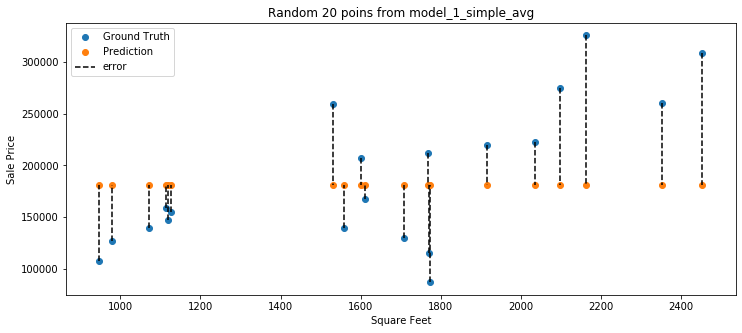

In [15]:
plot_pred_vs_actual(model_1_simple_avg)

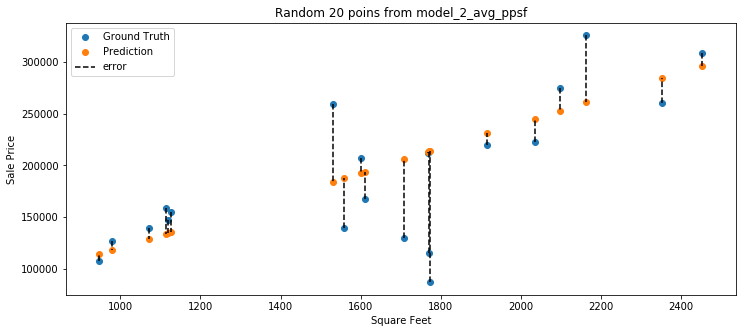

In [16]:
plot_pred_vs_actual(model_2_avg_ppsf)

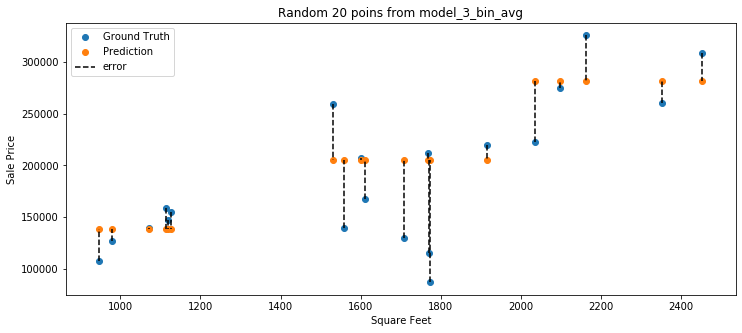

In [17]:
plot_pred_vs_actual(model_3_bin_avg)

In [18]:
#least square error
def sse(X, y, model):
    y_pred = make_prediction(model, X) 
    error = y - y_pred 
    squared_error = error ** 2 
    return squared_error.sum() 

In [19]:
X = housing['GrLivArea']
y = housing['SalePrice']
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
model_sse = pd.Series({model.__name__: sse(X, y, model) for model in models})
model_sse

model_1_simple_avg    9.207920e+12
model_2_avg_ppsf      4.662359e+12
model_3_bin_avg       5.393935e+12
dtype: float64

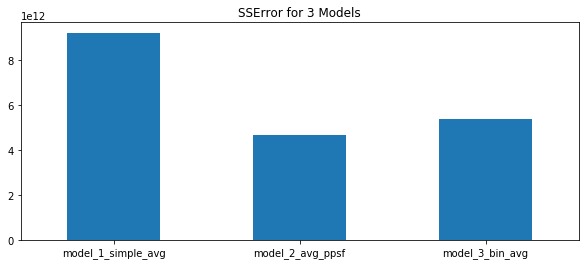

In [20]:
model_sse.plot(kind='bar', figsize=(10, 4), title='SSError for 3 Models', rot=0)

In [21]:
#another measure is root of the mean of squared errors
def rmse(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    squared_error = error ** 2
    mse = squared_error.mean()
    return np.sqrt(mse)

In [22]:
model_rmse = pd.Series({model.__name__: rmse(X, y, model) for model in models})
model_rmse

model_1_simple_avg    79415.330985
model_2_avg_ppsf      56510.145963
model_3_bin_avg       60782.203726
dtype: float64

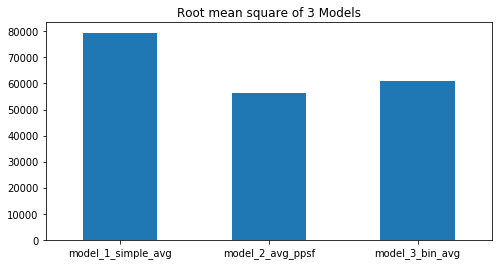

In [23]:
model_rmse.plot(kind='bar', figsize=(8, 4), title="Root mean square of 3 Models", rot=0)

In [24]:
def plot_errors(X, y, models, error_func):
    errors=pd.Series({model.__name__: error_func(X, y, model) for model in models})
    errors.plot(kind='bar', figsize=(8,4), title=error_func.__name__, rot=0)

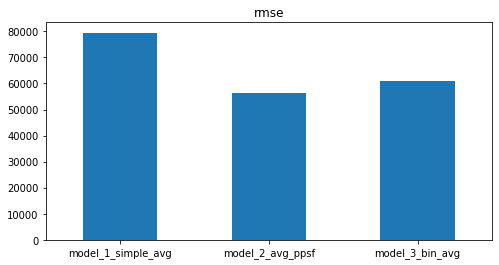

In [25]:
plot_errors(X, y, models, rmse)

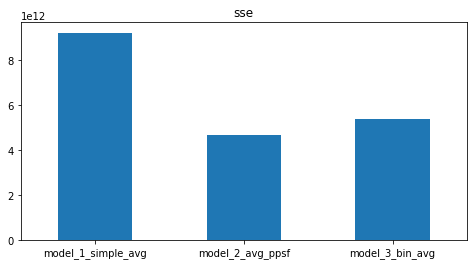

In [26]:
plot_errors(X, y, models, sse)

In [27]:
import pandas as pd
%matplotlib inline
housing = pd.read_csv('housing_sample.csv')
housing[:3]

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [28]:
housing.shape

(1460, 11)

In [29]:
housing.dtypes

Neighborhood     object
Exterior1st      object
YearBuilt         int64
LotFrontage     float64
GrLivArea         int64
GarageArea        int64
BedroomAbvGr      int64
FullBath          int64
OverallQual       int64
HeatingQC        object
SalePrice         int64
dtype: object

In [30]:
#pandas isna() method converts all the values in a DataDrame to True or False based on whether they are missing or not 
housing.isna().sum()

Neighborhood      0
Exterior1st       0
YearBuilt         0
LotFrontage     259
GrLivArea         0
GarageArea        0
BedroomAbvGr      0
FullBath          0
OverallQual       0
HeatingQC         0
SalePrice         0
dtype: int64

# Kind of data

$ Continuous\  data $ are always numeric and don’t have a limited, known, and discrete set of possibilities. 
- There is also a natural ordering to the numbers, where larger values mean ‘more’ of that column. 
- Columns like GrLivArea or GarageArea are continuous as there is no known distinct set of values these columns will hold.


$ Categorical\  columns $ have discrete values. 
- The set of discrete values is usually known and limited. 
- All columns containing strings are necessarily categorical, but numeric columns can be categorical as well. 
- Neighborhood, Exterior1st, and HeatingQC are categorical since they contain strings.

If integers/numericals in a column are discrete, all the values are known, and they are limited, they can be categorical.

Although its possible for a house to have any number of bathrooms or bedrooms, these columns are much closer to the categorical
column definition than the continuous one. 

Within categorical, there are two further classifications, ordinal and nominal variables. 
- Ordinal variables have a particular ordering such as a rating on a survey or quality of a house.
- Nominal variables do not have any inherent ordering. Type of neighborhood or exterior of a house, or zip code
are examples of nominal variables. 

As we continue along our EDA, we will label each column we see as continuous, ordinal, or nominal.

# Univariate data analyses

For continuous data, understand its distribution by:
- Finding summary statistics - min, max, mean, median, standard deviation
- Making boxplots, histograms, and Kernel-density estimate plots

For categorical data, 
- look at the frequency of each category 
- and if numeric will sometimes one can compute the same summary statistics as continuous data (especially if it is ordinal). 

Explore each column at a time

In [31]:
#Neighborhood
housing['Neighborhood'].value_counts(normalize=True).round(3).head()

NAmes      0.154
CollgCr    0.103
OldTown    0.077
Edwards    0.068
Somerst    0.059
Name: Neighborhood, dtype: float64

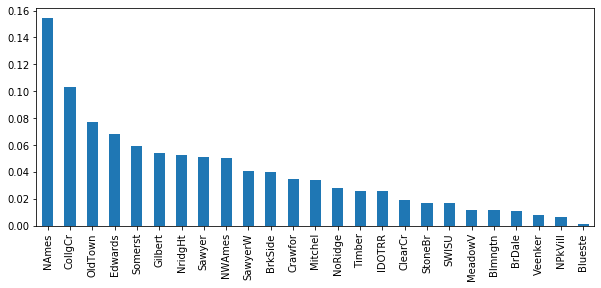

In [32]:
housing['Neighborhood'].value_counts(normalize=True).plot(kind='bar', figsize=(10,4))

In [33]:
#Exterior1st
housing['Exterior1st'].value_counts().head(10)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Name: Exterior1st, dtype: int64

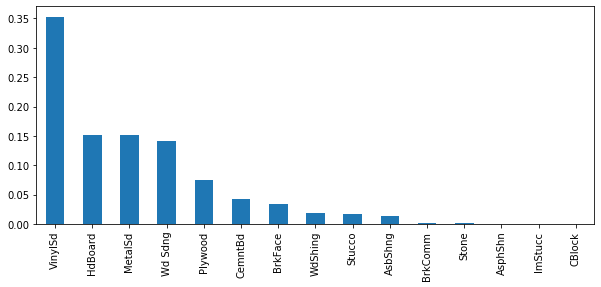

In [34]:
housing['Exterior1st'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4))

In [35]:
housing['YearBuilt'].nunique()

112

In [36]:
housing['YearBuilt'].value_counts().head(10)

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
Name: YearBuilt, dtype: int64

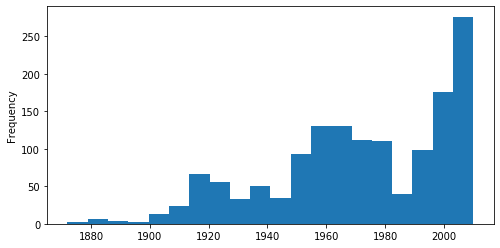

In [37]:
housing['YearBuilt'].plot(kind='hist', bins=20, figsize=(8,4))

In [38]:
housing['YearBuilt'].agg(['min', 'max'])

min    1872
max    2010
Name: YearBuilt, dtype: int64

In [39]:
bins = [1871, 1899, 1934, 1949, 1969, 1999, 2010]
pd.cut(housing['YearBuilt'], bins).value_counts()

(1969, 1999]    412
(1999, 2010]    388
(1949, 1969]    342
(1899, 1934]    192
(1934, 1949]    111
(1871, 1899]     15
Name: YearBuilt, dtype: int64

In [40]:
pd.cut(housing['YearBuilt'], bins).value_counts(normalize=True).sort_index().round(2)

(1871, 1899]    0.01
(1899, 1934]    0.13
(1934, 1949]    0.08
(1949, 1969]    0.23
(1969, 1999]    0.28
(1999, 2010]    0.27
Name: YearBuilt, dtype: float64

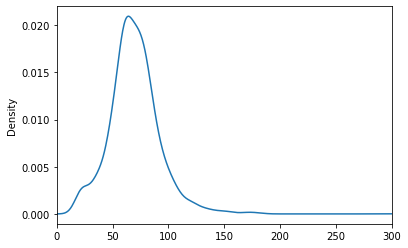

In [41]:
housing['LotFrontage'].plot(kind='kde', xlim=(0,300))

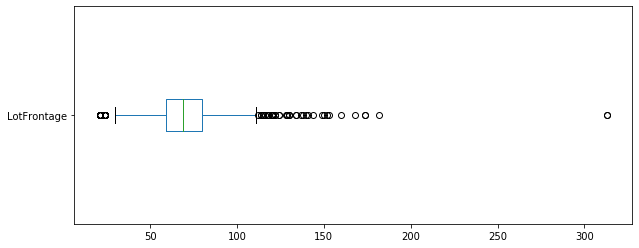

In [42]:
housing['LotFrontage'].plot(kind='box', vert=False, figsize=(10,4))

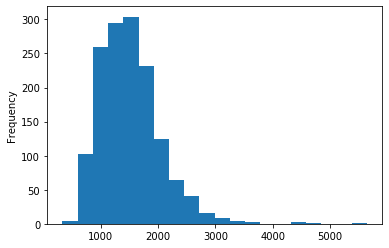

In [68]:
housing['GrLivArea'].plot(kind='hist', bins=20)

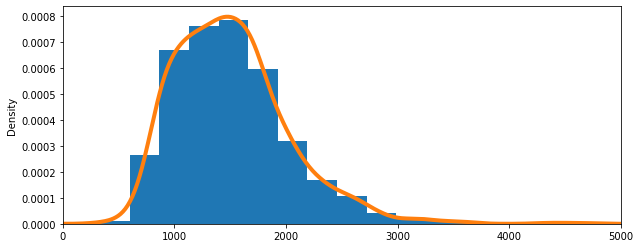

In [43]:
housing['GrLivArea'].plot(kind='hist', bins=20, density=True, figsize=(10,4))
housing['GrLivArea'].plot(kind='kde', linewidth=4, xlim=(0,5000));

In [76]:
housing.groupby('Neighborhood').agg(mean_price=('SalePrice', 'mean')) \
.sort_values('mean_price').plot(kind='bar', figsize=(10, 4));

TypeError: aggregate() missing 1 required positional argument: 'arg'